# Step 1: Data Description

## Candidate Information
- **ID**: A unique ID to identify a candidate
- **Salary**: Annual CTC offered to the candidate (in INR)
- **DOJ**: Date of joining the company
- **DOL**: Date of leaving the company
- **Designation**: Designation offered in the job
- **JobCity**: Location of the job (city)
- **Gender**: Candidate's gender
- **DOB**: Date of birth of the candidate

## Academic Background
- **10percentage**: Overall marks obtained in grade 10 examinations
- **10board**: The school board whose curriculum the candidate followed in grade 10
- **12graduation**: Year of graduation - senior year high school
- **12percentage**: Overall marks obtained in grade 12 examinations
- **12board**: The school board whose curriculum the candidate followed in grade 12
- **CollegeID**: Unique ID identifying the college attended
- **CollegeTier**: Tier of college
- **Degree**: Degree obtained/pursued by the candidate
- **Specialization**: Specialization pursued by the candidate
- **CollegeGPA**: Aggregate GPA at graduation

## Location Information
- **CollegeCityID**: Unique ID for the city in which the college is located
- **CollegeCityTier**: The tier of the city in which the college is located
- **CollegeState**: Name of the state where the college is located

## Graduation and Test Scores
- **GraduationYear**: Year of graduation (Bachelor’s degree)
- **English**: Scores in AMCAT English section
- **Logical**: Scores in AMCAT Logical section
- **Quant**: Scores in AMCAT Quantitative section
- **Domain**: Standardized Scores in AMCAT’s domain module
- **ComputerProgramming**: Score in AMCAT’s Computer programming section

## Engineering Specializations and Scores
- **ElectronicsAndSemicon**: Score in AMCAT’s Electronics & Semiconductor Engineering section
- **ComputerScience**: Score in AMCAT’s Computer Science section
- **MechanicalEngg**: Score in AMCAT’s Mechanical Engineering section
- **ElectricalEngg**: Score in AMCAT’s Electrical Engineering section
- **TelecomEngg**: Score in AMCAT’s Telecommunication Engineering section
- **CivilEngg**: Score in AMCAT’s Civil Engineering section

## Personality Test Scores
- **Conscientiousness**: Standardized Scores in one of the sections of AMCAT’s personality test
- **Agreeableness**: Standardized Scores in one of the sections of AMCAT’s personality test
- **Extraversion**: Standardized Scores in one of the sections of AMCAT’s personality test
- **Neuroticism**: Standardized Scores in one of the sections of AMCAT’s personality test
- **Openness_to_experience**: Standardized Scores in one of the sections of AMCAT’s personality test


# **OBJECTIVE**
  
The objective of this Exploratory Data Analysis (EDA) is to:

1.Explore the dataset

2.Understand the distribution of the variables.

3.Identify potential relationships Using Univariate Analysis and Bivariate Analysis
between the variables and the target variable,which is given as "Salary".

4.Provide observations




# Step 2 
Importing data and display head,shape and description of Data

In [35]:
#importing the libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

In [36]:
#Reading the Data file
df = pd.read_excel("C:/Users/SANKET/Downloads/data.xlsx")

In [37]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [6]:
df.shape

(3998, 39)

In [10]:
#Removing Unnamed:0 column
df.drop("Unnamed: 0",axis=1,inplace =True)
df.shape

(3998, 38)

In [11]:
df.head()

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [125]:
df.describe()

,ID,Salary,DOJ,DOB,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,...,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Normalized_CollegeGPA,Combined_GPA
count,3.998000e+03,3.998000e+03,3998,3998,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,2013-07-02 11:04:10.325162496,1990-12-06 06:01:15.637819008,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,...,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110,7.169573,7.169573
min,1.124400e+04,3.500000e+04,1991-06-01 00:00:00,1977-10-30 00:00:00,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,...,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,4.907000,4.907000
25%,3.342842e+05,1.800000e+05,2012-10-01 00:00:00,1989-11-16 06:00:00,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,...,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200,6.650500,6.650500
50%,6.396000e+05,3.000000e+05,2013-11-01 00:00:00,1991-03-07 12:00:00,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,...,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300,7.180000,7.180000
75%,9.904800e+05,3.700000e+05,2014-07-01 00:00:00,1992-03-13 18:00:00,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,...,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,7.640000,7.640000
max,1.298275e+06,4.000000e+06,2015-12-01 00:00:00,1997-05-27 00:00:00,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,...,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400,9.993000,9.993000
std,3.632182e+05,2.127375e+05,NaN,NaN,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,...,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075,0.740663,0.740663


# EXPLORATORY DATA ANALYSIS

In [38]:
#Missing values
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

No missing values in the dataset

In [24]:
print("\nNumerical Columns:")
numerical_cols = df.select_dtypes(include=['int64', 'float64'])
print(numerical_cols.columns)
print(numerical_cols.shape)


Numerical Columns:
Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')
(3998, 27)


In [23]:
print("\nCategorical Columns:")
categorical_cols = df.select_dtypes(include=['object'])
print(categorical_cols.columns)
print(categorical_cols.shape)


Categorical Columns:
Index(['DOL', 'Designation', 'JobCity', 'Gender', '10board', '12board',
       'Degree', 'Specialization', 'CollegeState'],
      dtype='object')
(3998, 9)


In [25]:
#finding duplicate vales
df.duplicated().sum()

np.int64(0)

no duplicate data

Exploratory Data Analysis

Step 2: Univariate Analysis


## _Step 3: Univariate Analysis_

In [33]:
print(df["Salary"].describe().apply(lambda x: format(x, ".0f")))

count       3998
mean      307700
std       212737
min        35000
25%       180000
50%       300000
75%       370000
max      4000000
Name: Salary, dtype: object


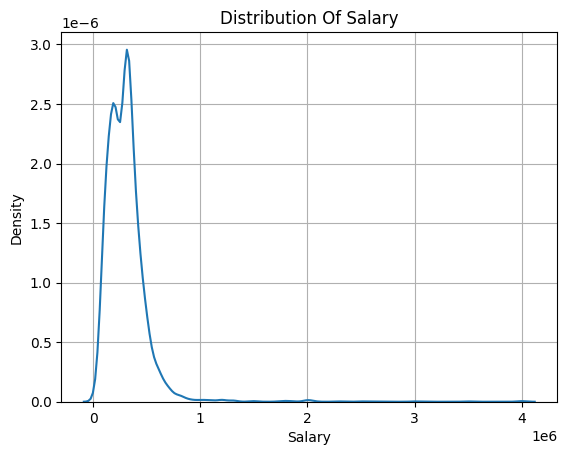

In [40]:
sns.kdeplot(data=df["Salary"])
plt.grid()
plt.title("Distribution Of Salary")
plt.show()

**Insights**

We can see High density near the beginning range of the salary in between 0-100000,which suggests that majority of individuals are earning within this salary range.

Beyond 100000,the density fall downs significantly, suggesting very few individuals earn in this range.

In [50]:
df["Specialization"].value_counts().head(10)

Specialization
electronics and communication engineering    880
computer science & engineering               744
information technology                       660
computer engineering                         600
computer application                         244
mechanical engineering                       201
electronics and electrical engineering       196
electronics & telecommunications             121
electrical engineering                        82
electronics & instrumentation eng             32
Name: count, dtype: int64

In [56]:
import textwrap

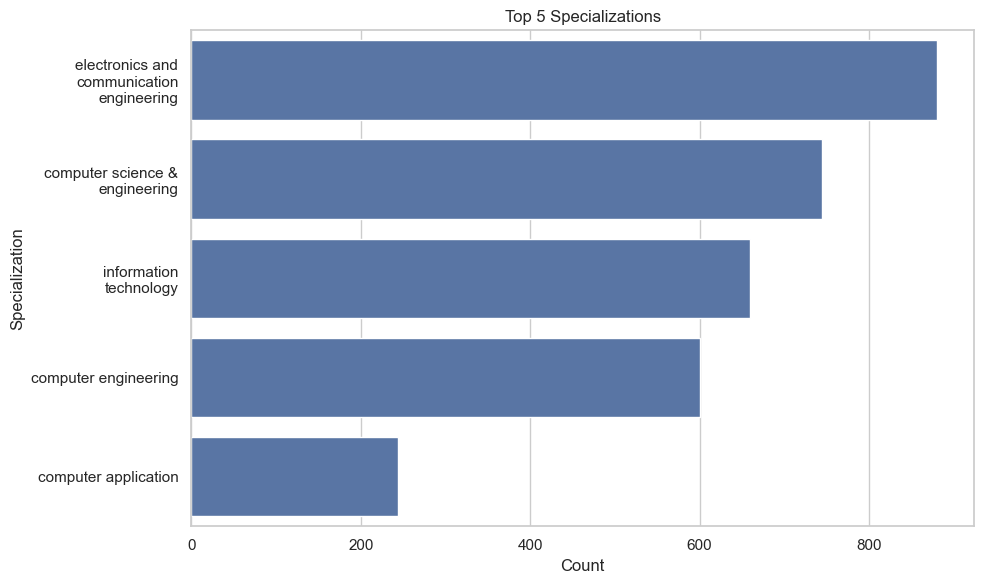

In [61]:
top_5_specializations = df["Specialization"].value_counts().head(5)
import textwrap

labels = top_5_specializations.index
wrapped_labels = [textwrap.fill(label, width=20) for label in labels]
plt.figure(figsize=(10,6))
sns.barplot(x=top_5_specializations.values, y=top_5_specializations.index, orient='h')
plt.title("Top 5 Specializations")
plt.xlabel("Count")
plt.ylabel("Specialization")
plt.yticks(range(len(labels)), wrapped_labels)
plt.tight_layout()
plt.show()

**Insights Specialization**

* **Electronics and Communication Engineering** is the most common specialization, indicating strong popularity and demand.
* **Computer Science & Engineering** is the second most popular, aligned with high demand for IT and software roles.
* **Information Technology** and **Computer Engineering** are also highly represented, showing the dominance of tech-related fields.
* **Computer Application** has fewer individuals, suggesting lower popularity or fewer aligned job roles.

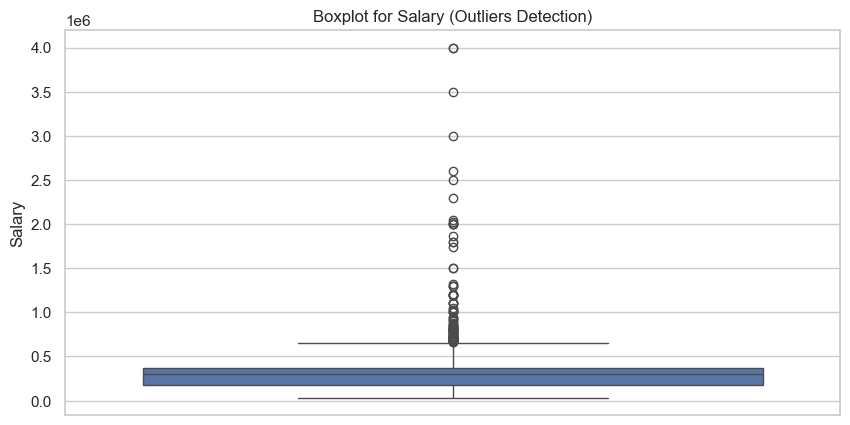

Outliers for Salary:
3       1100000
76       800000
92      1500000
123     1200000
128      675000
         ...   
3823     775000
3904     850000
3912     730000
3961     700000
3992     800000
Name: Salary, Length: 109, dtype: int64
--------------------------------------------------


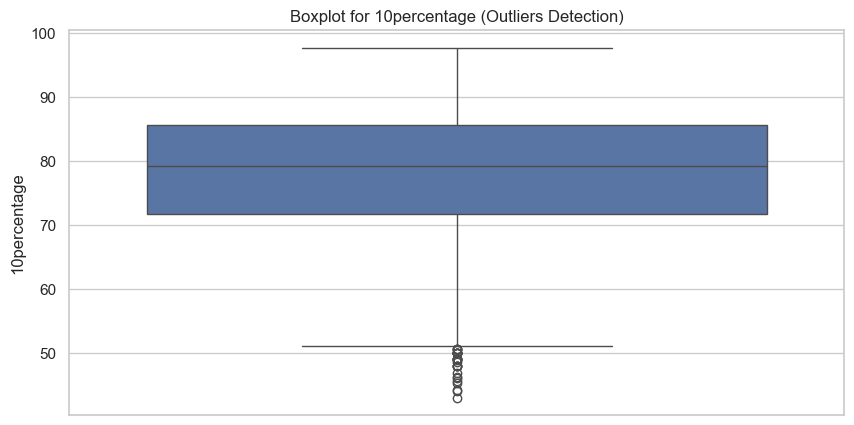

Outliers for 10percentage:
245     50.60
466     44.16
490     44.00
491     45.60
502     48.00
600     49.00
613     48.00
898     49.00
919     48.80
1064    49.00
1102    49.00
1169    48.50
1193    48.00
1235    50.60
1334    43.00
1838    50.00
1845    49.00
1955    45.33
1976    46.24
2037    48.00
2215    50.50
2292    50.00
2432    50.00
2655    50.66
2885    46.80
2982    50.00
3284    50.00
3425    50.00
3690    46.00
3743    49.90
Name: 10percentage, dtype: float64
--------------------------------------------------


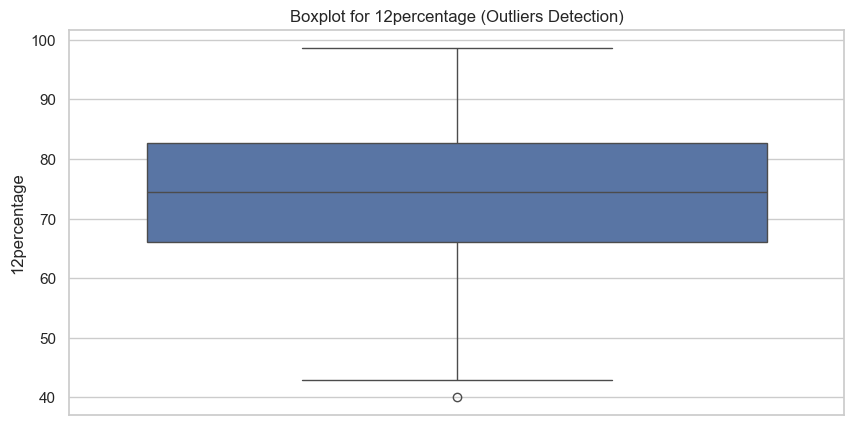

Outliers for 12percentage:
3337    40.0
Name: 12percentage, dtype: float64
--------------------------------------------------


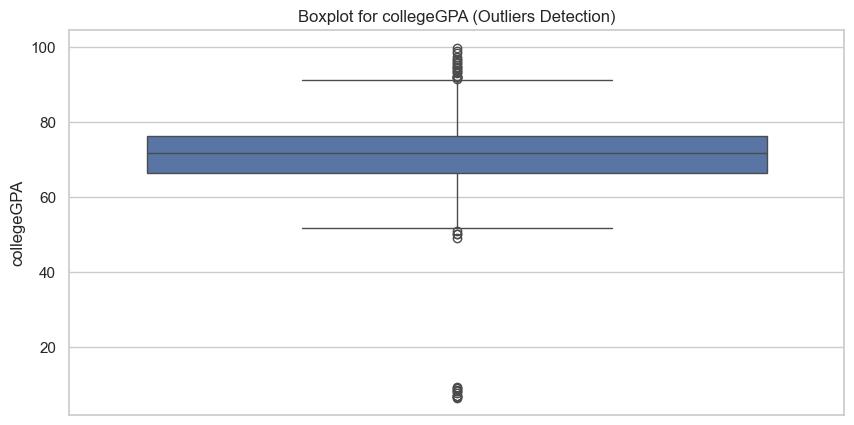

Outliers for collegeGPA:
7        8.58
44      92.10
138      6.63
187     93.00
477     92.00
614     93.60
690     99.93
788      6.80
874     94.50
907     50.00
1029    92.30
1134    96.00
1264    97.30
1345    93.30
1419     6.85
1439     8.07
1510    96.70
1685    94.70
1767     7.56
2151     6.95
2152    95.30
2229     8.13
2293     9.30
2463    92.00
2662     8.88
2691     8.89
2703    94.00
2836    49.07
2880    92.00
2988    94.60
3151    98.40
3276    95.70
3293    51.00
3308     6.45
3323    96.90
3448    50.00
3833    91.60
3850    99.00
Name: collegeGPA, dtype: float64
--------------------------------------------------


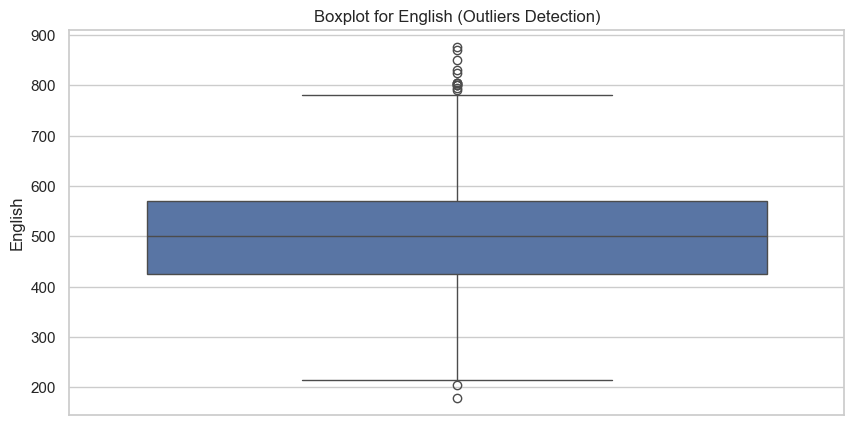

Outliers for English:
275     875
444     825
668     870
839     790
847     800
935     205
1183    805
1217    180
1450    830
1519    795
2077    800
2122    800
2385    805
2596    805
3044    850
Name: English, dtype: int64
--------------------------------------------------


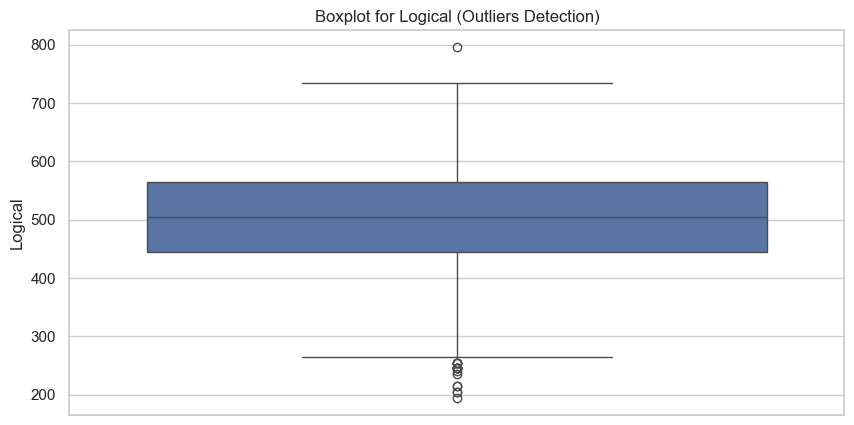

Outliers for Logical:
101     255
133     205
207     245
345     215
628     215
1014    795
1160    255
1439    245
2141    255
2265    255
2796    240
2830    195
2891    245
3119    245
3159    245
3784    205
3876    235
3953    245
Name: Logical, dtype: int64
--------------------------------------------------


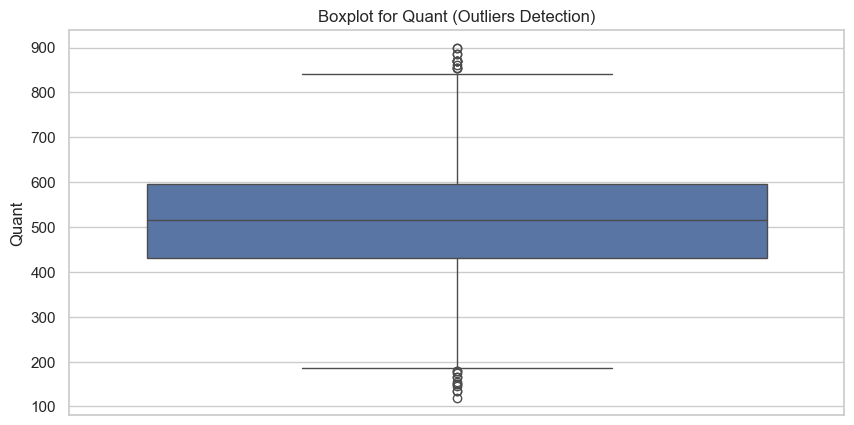

Outliers for Quant:
195     870
522     165
564     180
698     860
783     180
899     870
1148    175
1310    870
1661    870
1815    135
2007    855
2134    145
2155    870
2411    885
2437    120
2490    900
2616    135
2932    165
2957    900
2988    885
3165    855
3239    855
3258    150
3283    150
3616    155
Name: Quant, dtype: int64
--------------------------------------------------


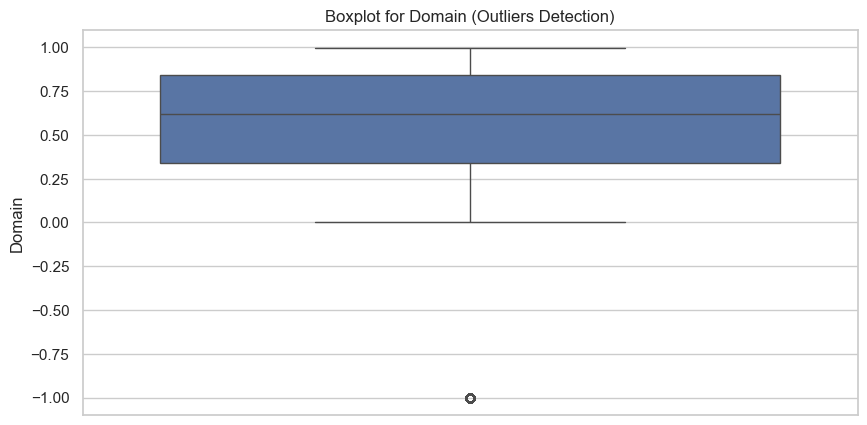

Outliers for Domain:
5      -1.0
14     -1.0
16     -1.0
22     -1.0
35     -1.0
       ... 
3942   -1.0
3958   -1.0
3960   -1.0
3969   -1.0
3978   -1.0
Name: Domain, Length: 246, dtype: float64
--------------------------------------------------


In [67]:
numerical_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot for {col} (Outliers Detection)')
    plt.show()

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find the outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    
    # Print the outliers for this column
    print(f'Outliers for {col}:')
    print(outliers)
    print('-' * 50)


**Insights On Outliers From BoxPlot Analysis**
* **Outliers for Salary**:The majority of the outliers are above 700,000.
The outliers in the Salary column are skewed towards the higher end, with most of them exceeding 700,000. This suggests that there are a few individuals who earn significantly more than the rest.

* **Outliers for 10percentage**:The majority of the outliers are above 48.0
The outliers in the 10percentage column are also skewed towards the higher end, with most of them above 48.00.
  
*  **Outliers for 12percentage** :The outlier in the 12percentage column, which is 40.0.

* **Outliers for Logical**:The majority of the outliers are above 240.
* **Outliers for Quant**:The majority of the outliers are above 850.

**Difficulties faced in detecting outlier in collegegpa using Boxplot**

Converting percentage to CGPA in the collegeGPA column is necessary because different institutions and countries use different grading systems. CGPA is a standardized way to express academic achievement, making it easier to compare and evaluate students from different backgrounds.

Thier is a very different range of outliers in the collegegpa column ranging from 6.45 to 99.93 which isnt a right outlier detection.
firstly we convert percentage to normalized percentage (which is sgpa) and and then combining the values we can then look to a more standard data of collegeGPA.

The outliers are as below boxplot:

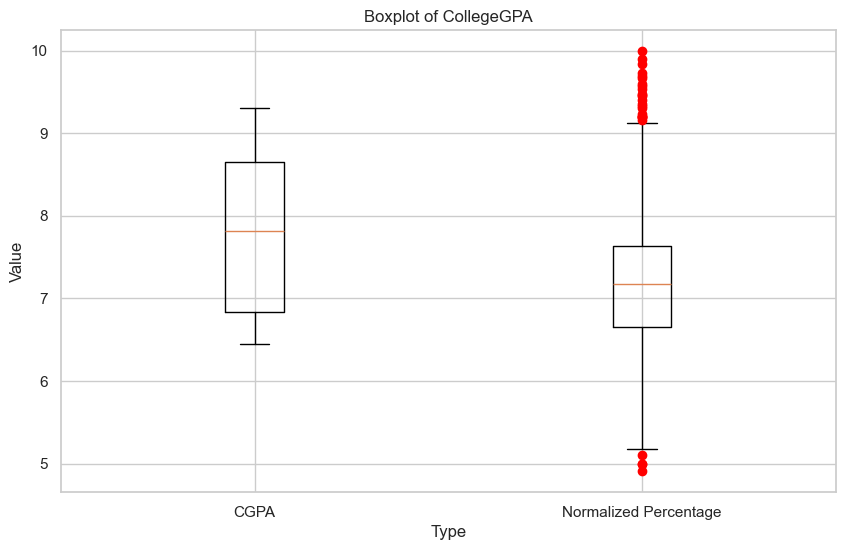

Outliers for CGPA:
[8.58 6.63 6.8  6.85 8.07 7.56 6.95 8.13 9.3  8.88 8.89 6.45]
Outliers for Normalized Percentage:
[7.8   7.006 7.    ... 7.    7.042 6.8  ]


In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
bp = plt.boxplot([df.loc[df['GPA_Type'] == 'CGPA', 'collegeGPA'], df.loc[df['GPA_Type'] == 'Percentage', 'Normalized_CollegeGPA']], 
                 flierprops=dict(markeredgecolor='red', markerfacecolor='red'))
plt.xticks([1, 2], ['CGPA', 'Normalized Percentage'])
plt.title('Boxplot of CollegeGPA')
plt.xlabel('Type')
plt.ylabel('Value')
plt.show()

outliers_cgpa = df.loc[df['GPA_Type'] == 'CGPA', 'collegeGPA'].values[(df.loc[df['GPA_Type'] == 'CGPA', 'collegeGPA'].values > bp['boxes'][0].get_ydata()[1]) | (df.loc[df['GPA_Type'] == 'CGPA', 'collegeGPA'].values < bp['boxes'][0].get_ydata()[0])]
outliers_percentage = df.loc[df['GPA_Type'] == 'Percentage', 'Normalized_CollegeGPA'].values[(df.loc[df['GPA_Type'] == 'Percentage', 'Normalized_CollegeGPA'].values > bp['boxes'][1].get_ydata()[1]) | (df.loc[df['GPA_Type'] == 'Percentage', 'Normalized_CollegeGPA'].values < bp['boxes'][1].get_ydata()[0])]

print("Outliers for CGPA:")
print(outliers_cgpa)
print("Outliers for Normalized Percentage:")
print(outliers_percentage)

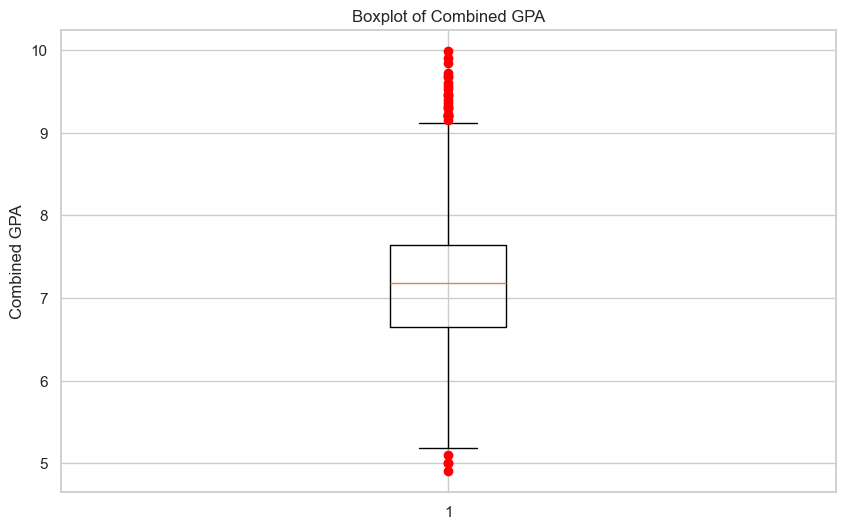

The Outliers for Combined collegeGPA are:
[7.8   7.006 7.    ... 7.    7.042 6.8  ]


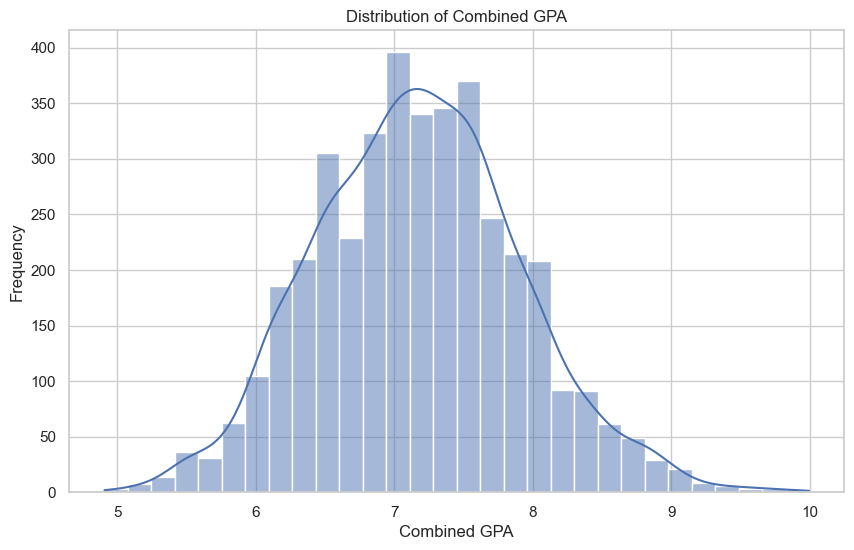

Mean Combined GPA: 7.169572786393196
Median Combined GPA: 7.18
Mode Combined GPA: 7.0
Insights on Combined GPA Distribution:
The distribution of Combined GPA shows a typical pattern with some high performers as outliers. The mean and median provide a good sense of the central tendency.


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Combined_GPA'] = df.apply(lambda row: row['collegeGPA'] if row['GPA_Type'] == 'CGPA' else row['Normalized_CollegeGPA'], axis=1)

plt.figure(figsize=(10, 6))
bp = plt.boxplot(df['Combined_GPA'], flierprops=dict(markeredgecolor='red', markerfacecolor='red'))
plt.title('Boxplot of Combined GPA')
plt.ylabel('Combined GPA')
plt.show()


outliers_combined = df['Combined_GPA'].values[(df['Combined_GPA'].values > bp['boxes'][0].get_ydata()[1]) | (df['Combined_GPA'].values < bp['boxes'][0].get_ydata()[0])]

print("The Outliers for Combined collegeGPA are:")
print(outliers_combined)


plt.figure(figsize=(10, 6))
sns.histplot(df['Combined_GPA'], kde=True, bins=30)
plt.title('Distribution of Combined GPA')
plt.xlabel('Combined GPA')
plt.ylabel('Frequency')
plt.show()


mean_combined_gpa = df['Combined_GPA'].mean()
median_combined_gpa = df['Combined_GPA'].median()
mode_combined_gpa = df['Combined_GPA'].mode()[0]

print(f"Mean Combined GPA: {mean_combined_gpa}")
print(f"Median Combined GPA: {median_combined_gpa}")
print(f"Mode Combined GPA: {mode_combined_gpa}")

print("Insights on Combined GPA Distribution:")
print("The distribution of Combined GPA shows a typical pattern with some high performers as outliers. The mean and median provide a good sense of the central tendency.")


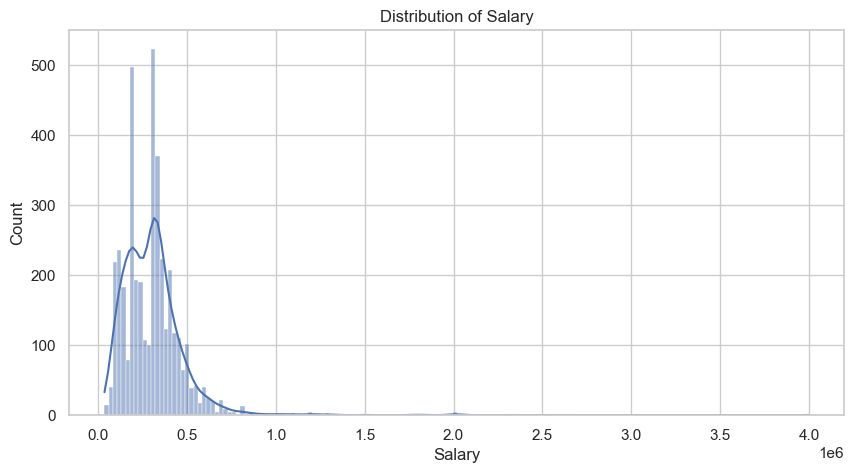

Insights for Salary:
- Distribution is right-skewed, indicating most salaries are lower, with a few high salary outliers.


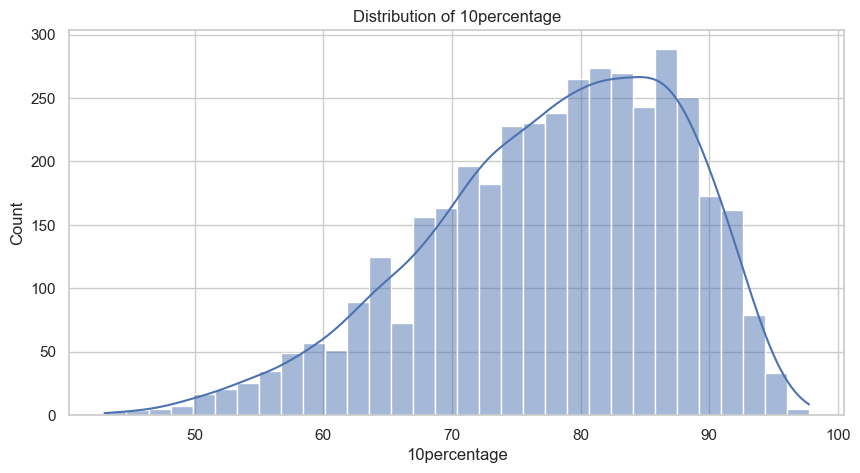

Insights for 10percentage:
- The distribution is left-skewed, meaning most students performed relatively well in 10th grade exams.


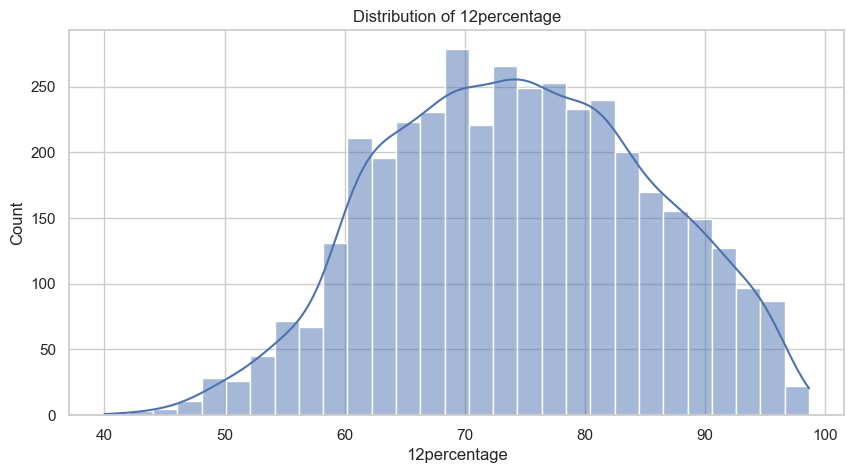

Insights for 12percentage:
- The distribution is fairly symmetrical, showing consistent performance across students in 12th grade.


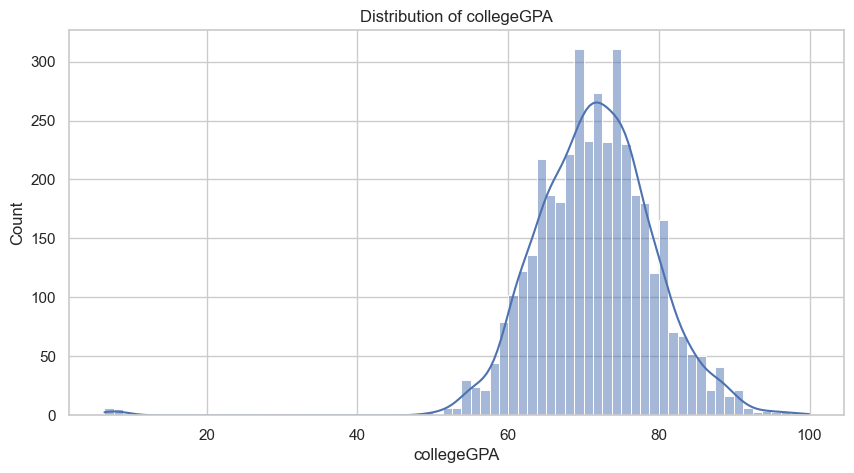

Insights for collegeGPA:
- Slight skew to the right, suggesting a majority of students have GPAs on the higher side, though some outliers exist.


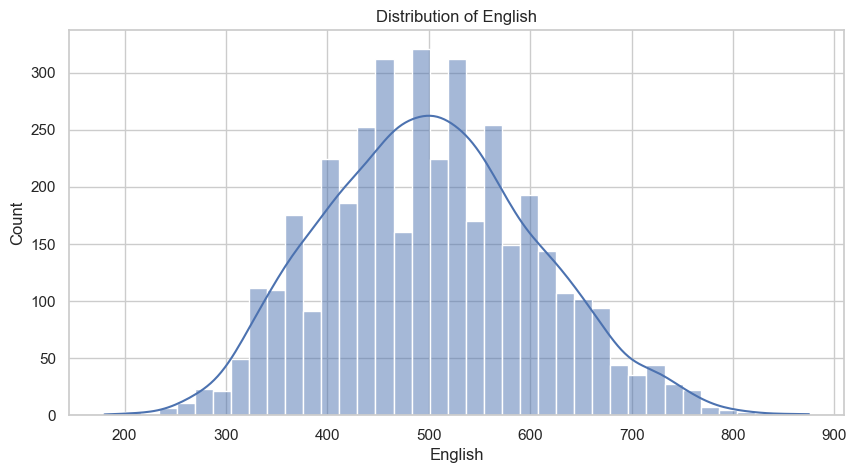

Insights for English:
- The distribution shows a cluster in the middle with a moderate level of skewness.


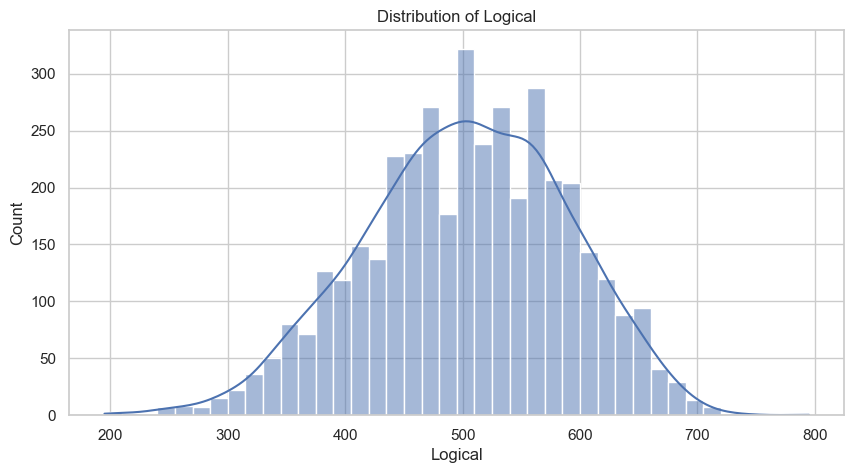

Insights for Logical:
- The scores are normally distributed with a peak in the middle, suggesting balanced logical skills among students.


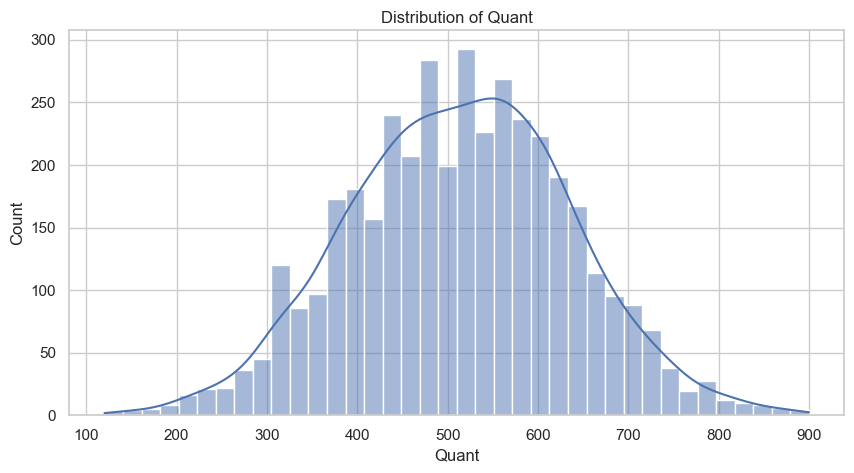

Insights for Quant:
- The Quant scores show a near-normal distribution, with most students scoring between average to high.


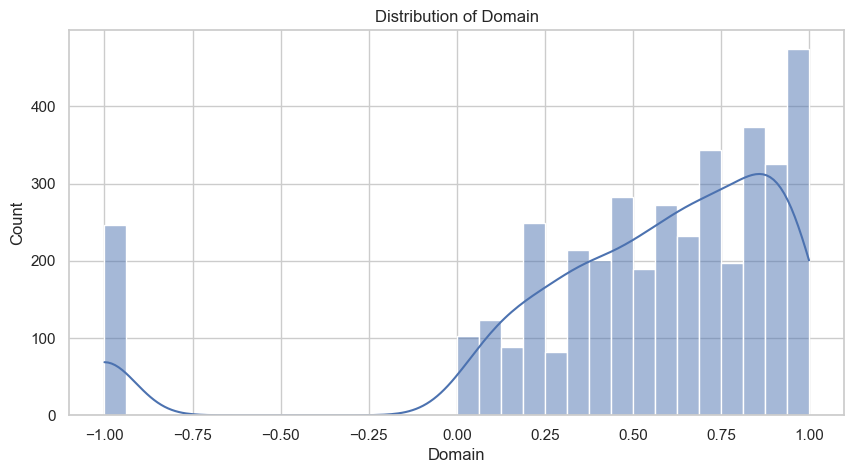

Insights for Domain:
- The Domain scores exhibit a slightly right-skewed distribution, with some students achieving higher scores.


In [83]:
numerical_cols = ['Salary', '10percentage', '12percentage', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain']

for I in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    if col == 'Salary':
        print("Insights for Salary:")
        print("- Distribution is right-skewed, indicating most salaries are lower, with a few high salary outliers.")
    elif col == '10percentage':
        print("Insights for 10percentage:")
        print("- The distribution is left-skewed, meaning most students performed relatively well in 10th grade exams.")
    elif col == '12percentage':
        print("Insights for 12percentage:")
        print("- The distribution is fairly symmetrical, showing consistent performance across students in 12th grade.")
    elif col == 'English':
        print("Insights for English:")
        print("- The distribution shows a cluster in the middle with a moderate level of skewness.")
    elif col == 'Logical':
        print("Insights for Logical:")
        print("- The scores are normally distributed with a peak in the middle, suggesting balanced logical skills among students.")
    elif col == 'Quant':
        print("Insights for Quant:")
        print("- The Quant scores show a near-normal distribution, with most students scoring between average to high.")
    

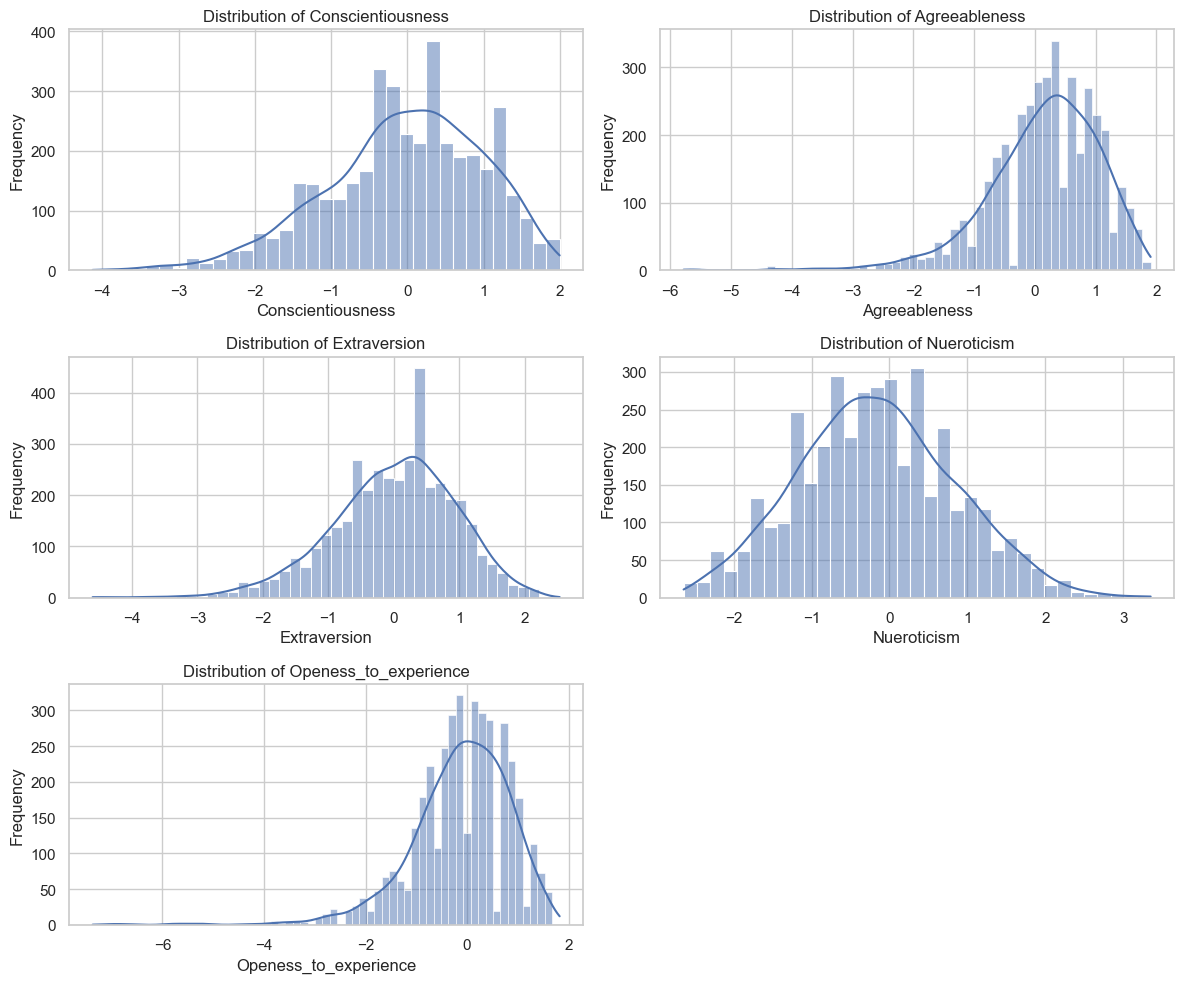

In [111]:
sns.set(style="whitegrid")
personality_columns = ['conscientiousness', 'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience']
plt.figure(figsize=(12, 10))
for i, col in enumerate(personality_columns, 1):
    plt.subplot(3, 2, i) 
    sns.histplot(df[col], kde=True, color='b')  
    plt.title(f'Distribution of {col.capitalize()}')
    plt.xlabel(f'{col.capitalize()}')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


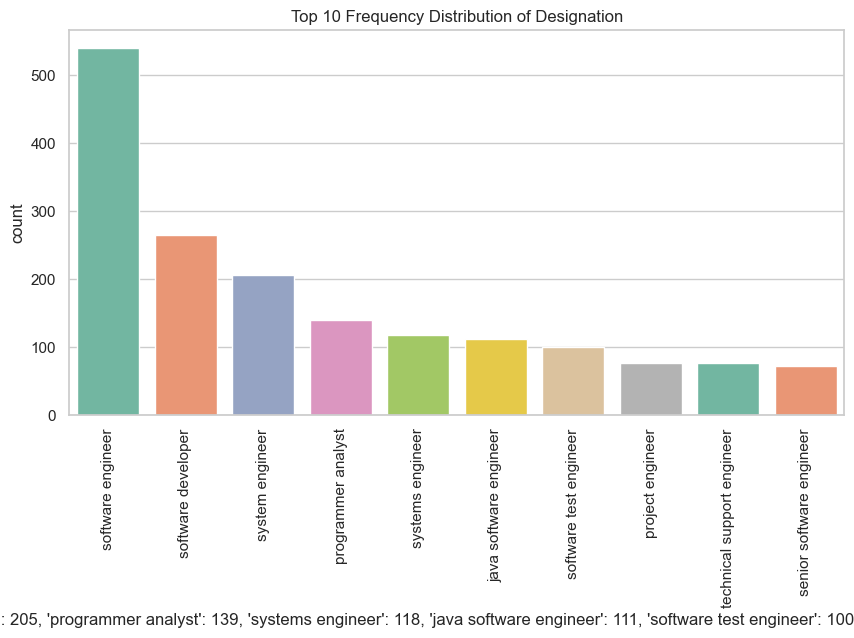

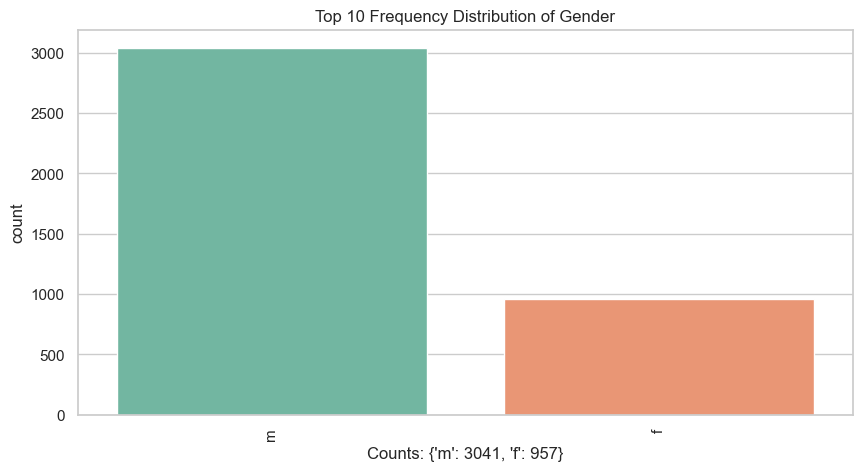

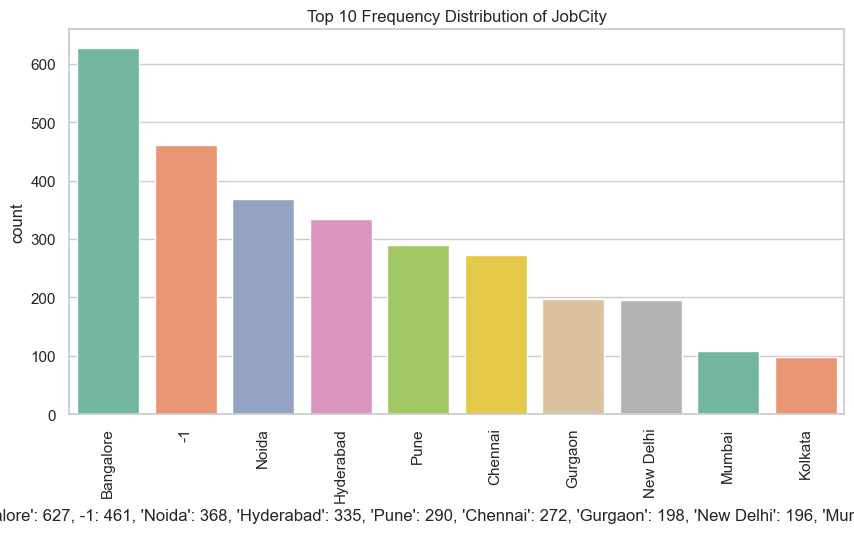

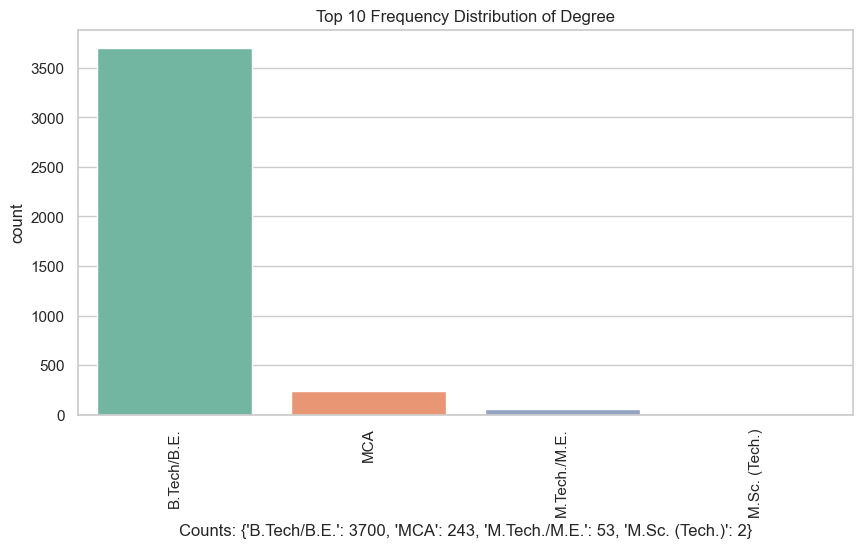

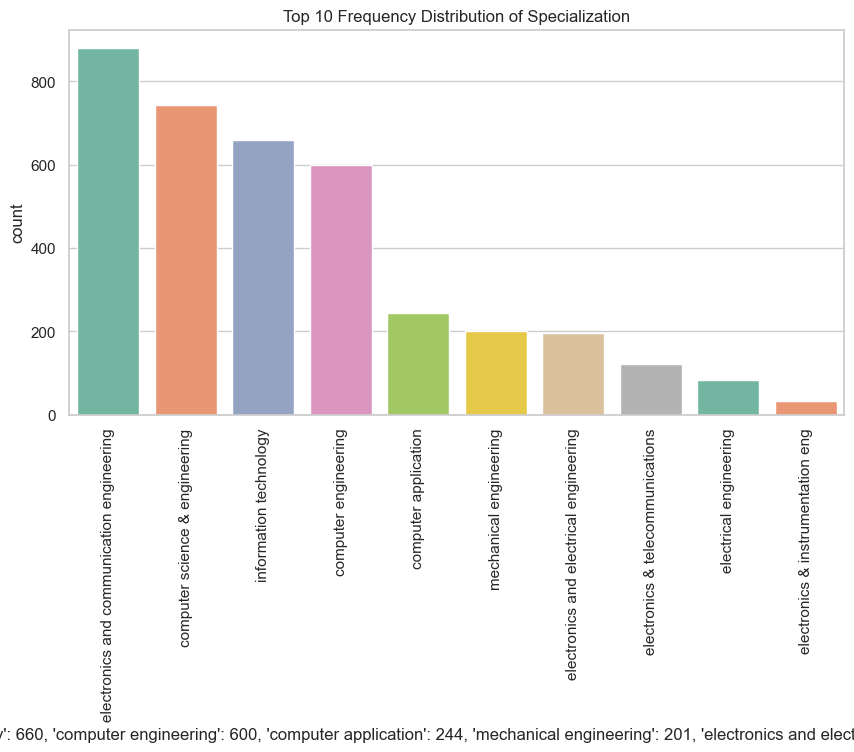

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

categorical_cols = ['Designation', 'Gender', 'JobCity', 'Degree', 'Specialization']

for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    
    top_10 = df[col].value_counts().nlargest(10).index
   
    sns.countplot(x=df[col], order=top_10, palette='Set2')
    plt.title(f'Top 10 Frequency Distribution of {col}')
    plt.xticks(rotation=90)
 
    counts = df[col].value_counts().nlargest(10)
    plt.xlabel(f'Counts: {counts.to_dict()}') 
    
    plt.show()


## _Step 4: Bivariate Analysis_

**A)** **Relationships Between Numerical Columns**

How salary varies across CGPA?

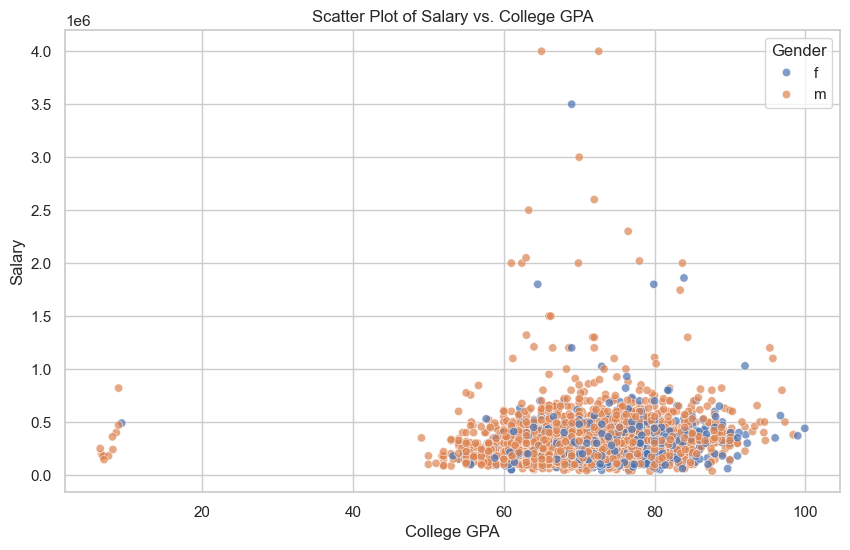

In [89]:
# Scatter plot for Salary vs. College GPA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='collegeGPA', y='Salary', hue='Gender', alpha=0.7)
plt.title('Scatter Plot of Salary vs. College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.show()




**Insights** :

* Most of the individuals with Higher College GPA earn salary in 0-100000.
* Most males dominating the range and lesser females within the range.
* Very Few indviduals with high college gpa earn above 150000.

**PLAIR PLOT**

Pair plots showing relationships between all numerical variables

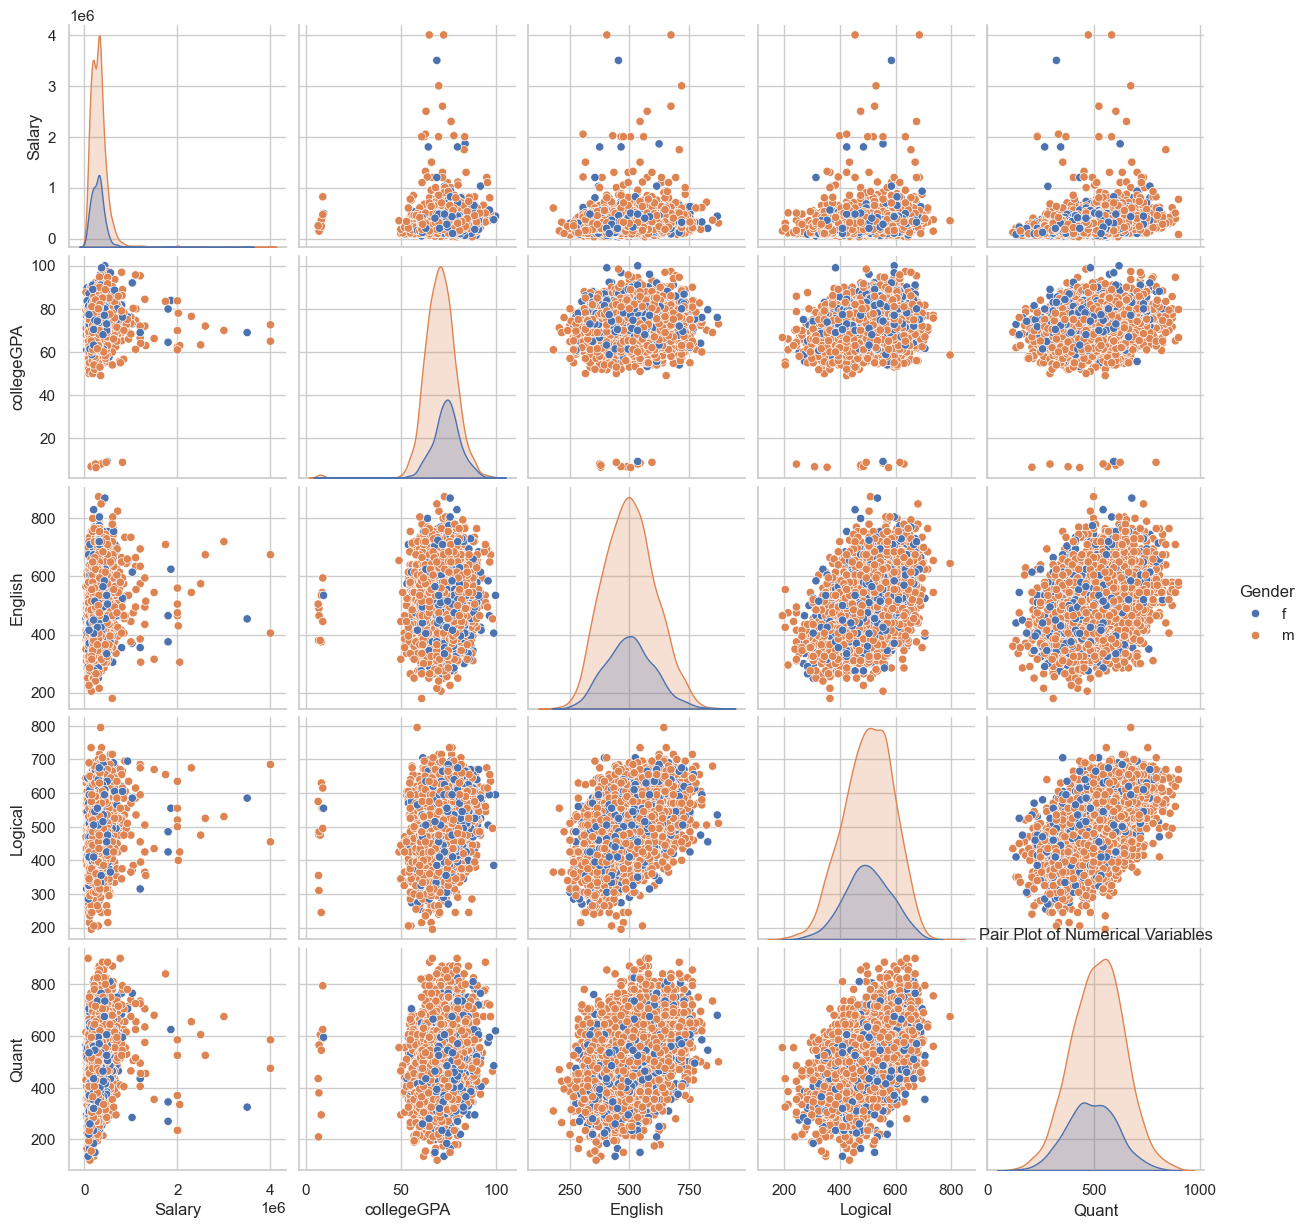

In [95]:
numerical_cols = ['Salary', 'collegeGPA', 'English', 'Logical', 'Quant']
    sns.pairplot(df[numerical_cols + ['Gender']], diag_kind='kde', hue='Gender')
    plt.title('Pair Plot of Numerical Variables')
    plt.show()

**Insights from the Pair Plot with respect to GENDER**

**Gender Distribution**:Dataset contains significantly more males (3041) than females (957).


* **Distribution of Salary:**

Males (orange dots) show a slightly higher density at the higher salary end compared to females (blue dots).

* **collegeGPA**:

Relatively normal distribution for college GPAs across both genders.

* **English, Logical, and Quant Scores**:

Similar distributions in English and Logical scores for both genders, with higher densities in mid-range scores.

* ***Correlations***:

* **Salary vs. collegeGPA**: Slight positive correlation; higher GPA may lead to higher salaries, but the correlation is weak.

* **Salary vs. Exam Scores**: Positive correlation; higher scores in English, Logical, and Quant are associated with higher salaries.

* **GPA and Exam Scores**: Positive correlation; higher scores in English, Logical, and Quant align with higher college GPAs.




**B)**  **Patterns Between Categorical and Numerical Columns**

How does Designation affect Salary?

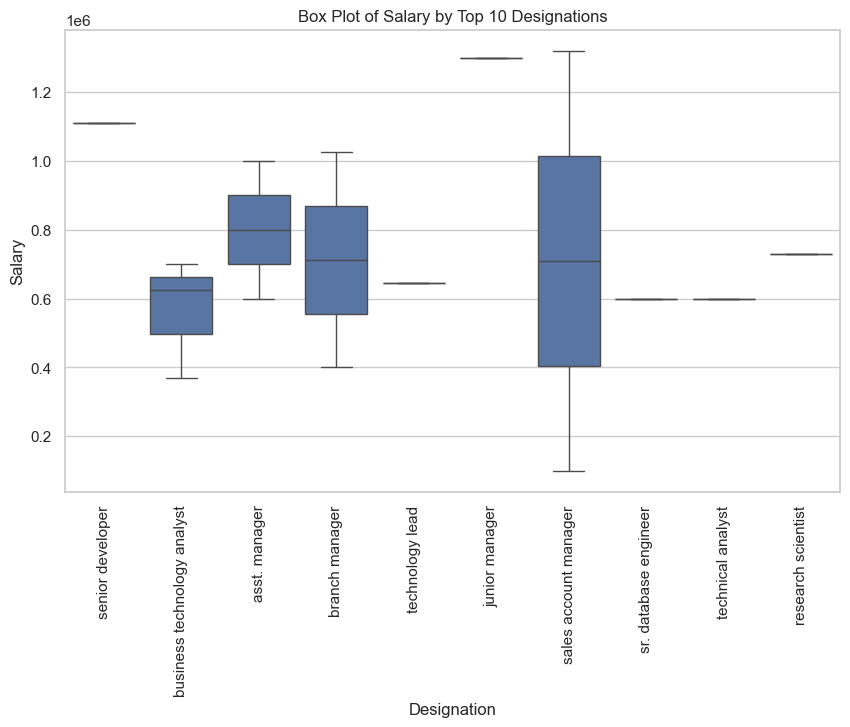

In [99]:
median_salaries = df.groupby('Designation')['Salary'].median().reset_index()

top_10_designations = median_salaries.nlargest(10, 'Salary')['Designation'].values


top_10_df = df[df['Designation'].isin(top_10_designations)]

plt.figure(figsize=(10, 6))
sns.boxplot(x='Designation', y='Salary', data=top_10_df)
plt.title('Box Plot of Salary by Top 10 Designations')
plt.xticks(rotation=90)
plt.show()



In [120]:
d3=df.groupby("Designation")[["Salary"]].mean()
d3



,Salary
Designation,
.net developer,223382.352941
.net web developer,196250.000000
account executive,287500.000000
account manager,350000.000000
admin assistant,102500.000000
...,...
web designer and seo,200000.000000
web developer,168981.481481
web intern,205000.000000


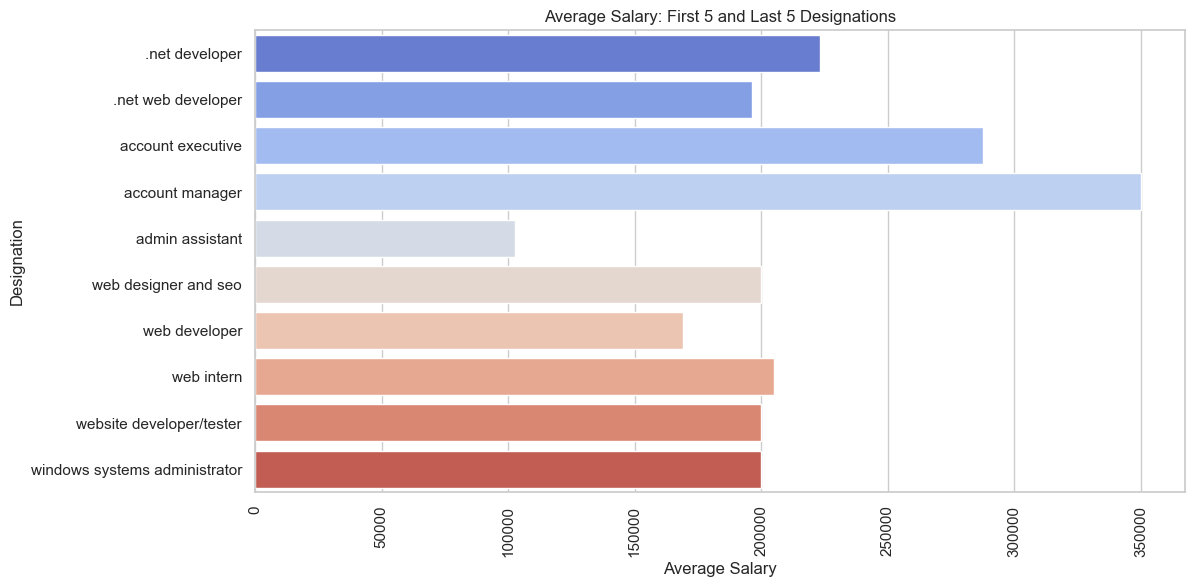

In [122]:

d3_reset = d3.reset_index()

d3_top_bottom = pd.concat([d3_reset.head(5), d3_reset.tail(5)])
plt.figure(figsize=(12, 6))
sns.barplot(x='Salary', y='Designation', data=d3_top_bottom, palette='coolwarm')
plt.title('Average Salary: First 5 and Last 5 Designations')
plt.xlabel('Average Salary')
plt.ylabel('Designation')
plt.xticks(rotation=90)
plt.show()


**Insights**

* Account manager earns the most salary with respect to other designations. 
* Admin assistant and developer earn significantly less salary.




How does specialization affect salary ?

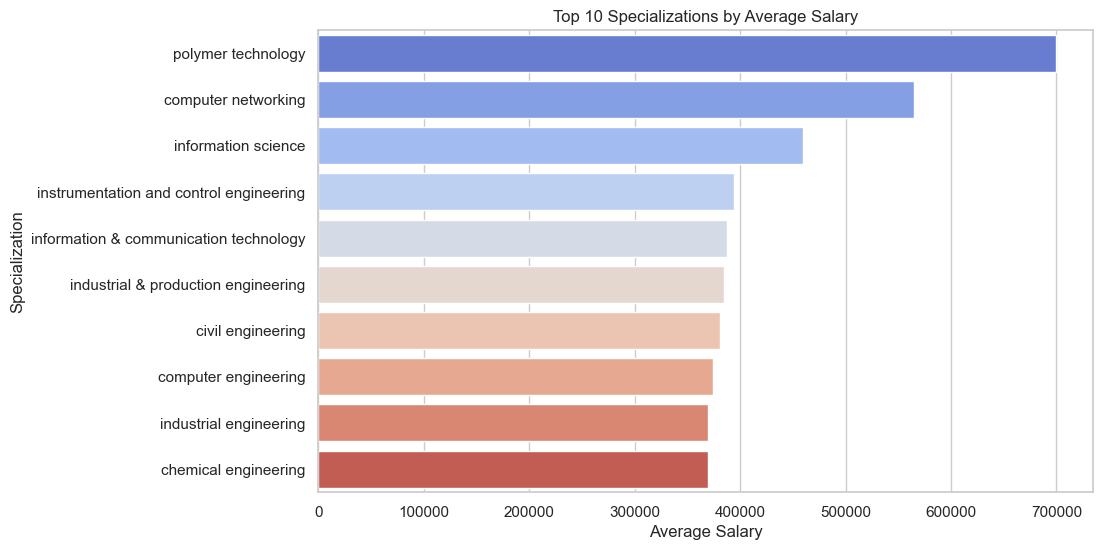

In [105]:
specialization_salary = df.groupby('Specialization')['Salary'].mean().reset_index()
top_10_specializations = specialization_salary.sort_values(by='Salary', ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x='Salary', y='Specialization', data=top_10_specializations, palette='coolwarm')
plt.title('Top 10 Specializations by Average Salary')
plt.xlabel('Average Salary')
plt.ylabel('Specialization')
plt.show()


**Insights about Specializations and Salary**

- **Polymer Technology**: Highest average salary, exceeding 700,000. Professionals in this field are highly valued and likely work in specialized, high-paying industries.
- **Computer Networking**: Second highest-paying specialization, with an average salary close to 600,000. Networking-related roles are in high demand due to the growing importance of digital infrastructure.
- **Information Science**: Professionals in this field earn around 500,000 on average. High demand for expertise in managing and interpreting large-scale data and information systems.
- **Instrumentation and Control Engineering**: Salaries are close to 400,000, indicating competitive compensation for roles in managing and automating industrial processes.
- **Information & Communication Technology (ICT)**: ICT specialists earn around 400,000 on average, reflecting the importance of communication technologies in modern enterprises.
- **Industrial & Production Engineering**: Slightly lower salary, around 350,000, but ranks highly among engineering disciplines. Crucial for optimizing manufacturing and production processes.
- **Civil Engineering**: Civil engineers earn approximately 300,000, with decent pay for professionals involved in large infrastructure projects.
- **Computer Engineering**: Average salary close to 300,000. Well-compensated, although slightly lower compared to other technology-driven specializations.
- **Industrial Engineering**: Salaries hover around 280,000. Important field but less specialized compared to others like Polymer Technology.
- **Chemical Engineering**: Rounds out the top 10, with an average salary around 250,000. This could indicate lower demand or a more saturated market compared to other specializations.


In [ ]:
# Create a contingency table for Designation and Gender
contingency_table = pd.crosstab(df['Designation'], df['Gender'])
# Create a contingency table for Designation and Gender
contingency_table = pd.crosstab(df['Designation'], df['Gender'])
# Plot the stacked bar plot
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 6), color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.title('Stacked Bar Plot: Designation by Gender', fontsize=16)
plt.xlabel('Designation', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender', fontsize=12)
plt.tight_layout()  # Adjust layout
plt.show()


# Step - 5 - Research Questions


# Q1
Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” Test this claim with the data given to you.


**Steps to test the claim**
* Load the Dataset and segregate according to the designation related to Computer Science Engineering like Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer

* Calculate the average, median, and range of salaries for the filtered designations


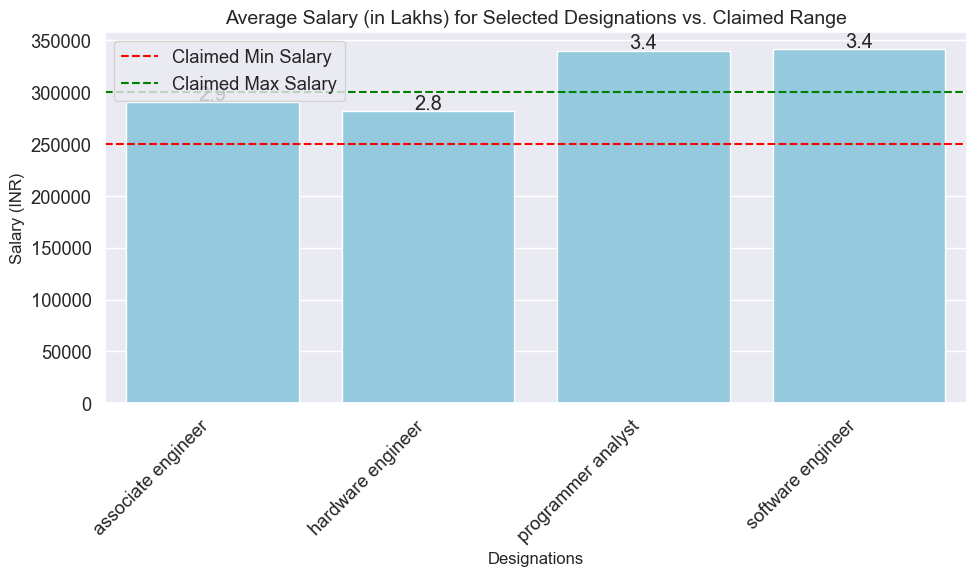

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns

designations_of_interest = ['programmer analyst', 'software engineer', 'hardware engineer', 'associate engineer']

filtered_df = df[df['Designation'].isin(designations_of_interest)]

if not filtered_df.empty:
    # Calculate average salary for each designation
    avg_salaries = filtered_df.groupby('Designation')['Salary'].mean()

    # Claimed salary ranges in lakhs
    claimed_min_salary = 2.5 * 100000  # Claimed minimum: 2.5 lakhs
    claimed_max_salary = 3 * 100000  # Claimed maximum: 3 lakhs

    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot the average salaries as a bar plot
    sns.barplot(x=avg_salaries.index, y=avg_salaries.values, color="skyblue")

    # Add the claimed salary ranges as horizontal lines
    plt.axhline(y=claimed_min_salary, color='red', linestyle='--', label='Claimed Min Salary')
    plt.axhline(y=claimed_max_salary, color='green', linestyle='--', label='Claimed Max Salary')

    # Add annotations (average salary values) on top of each bar
    for index, value in enumerate(avg_salaries.values):
        plt.text(index, value + 0.02 * 100000, f'{value/100000:.1f}', ha='center')

    # Customize plot
    plt.title('Average Salary (in Lakhs) for Selected Designations vs. Claimed Range', fontsize=14)
    plt.ylabel('Salary (INR)', fontsize=12)
    plt.xlabel('Designations', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

else:
    print("No records found for the specified designations.")


# Test Result

Mean Salary of Selected Roles: 339790.46 INR

Claimed Mean Salary: 2.5 to 300000.00 INR

Claim **TRUE** : The average salary is above 3 lakhs.i.e 339790.46 INR

# Q2


Is there a relationship between gender and specialization? (i.e. Does the preference of Specialisation depend on the Gender?)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          3998 non-null   object
 1   Specialization  3998 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB
None
Specialization  aeronautical engineering  \
Gender                                     
f                                      1   
m                                      2   

Specialization  applied electronics and instrumentation  \
Gender                                                    
f                                                     2   
m                                                     7   

Specialization  automobile/automotive engineering  biomedical engineering  \
Gender                                                                      
f                                               0                       2   
m                          

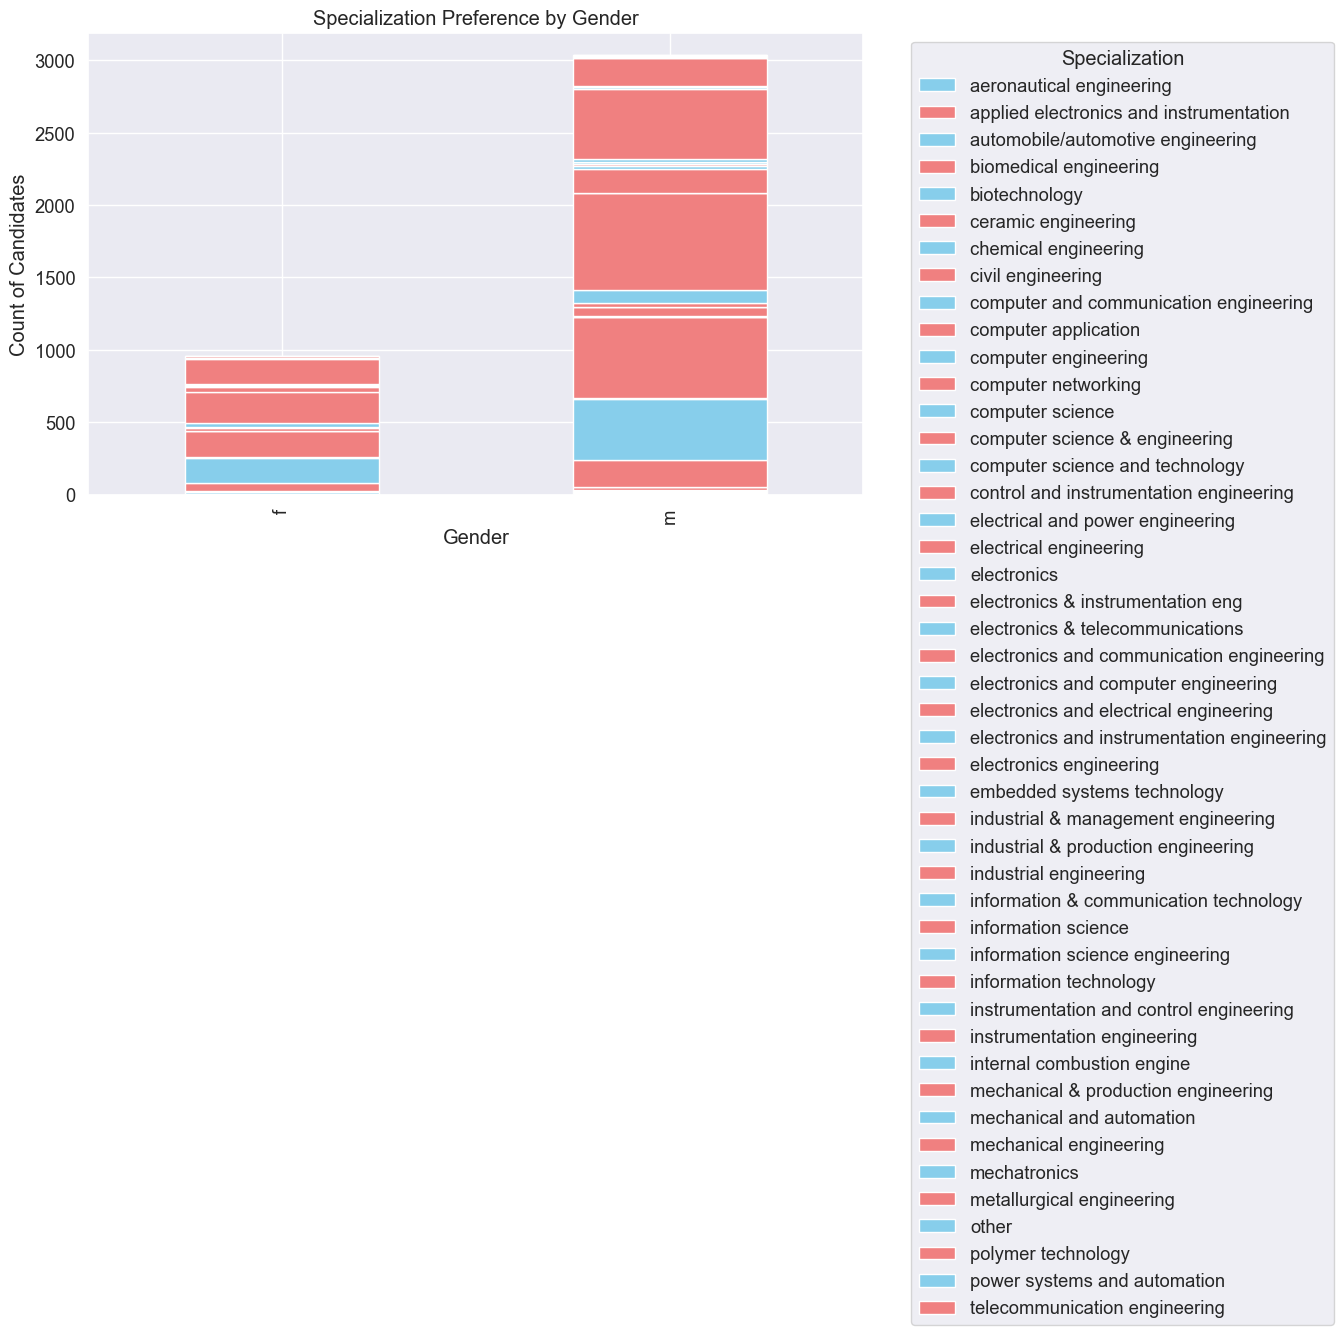

Chi-Square Statistic: 104.46891913608455, P-value: 1.2453868176976918e-06
Reject the null hypothesis: There is a significant relationship between gender and specialization.


In [162]:
import pandas as pd
# Check relevant columns and any missing values
print(df[['Gender', 'Specialization']].info())
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Specialization'])
print(contingency_table)

# Visualize the relationship using a stacked bar plot
import matplotlib.pyplot as plt
import seaborn as sns

contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.title('Specialization Preference by Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Candidates')
plt.legend(title='Specialization', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
from scipy.stats import chi2_contingency

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, P-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: There is a significant relationship between gender and specialization.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between gender and specialization.")


-The Chi-Square test is used to determine whether there is a statistically significant relationship between two categorical variables.

**In chi-square test**:

* Null Hypothesis (H0): There is no relationship between gender and specialization [p > threshold ].(they are independent).
* Alternative Hypothesis (H1): There is a relationship between gender and specialization[p < threshold] (they are dependent).

**Insights**

* Obtained a Chi-Square statistic of 104.47 and a P-value of 1.245e-06.
* P-value lower than that of which is the typical threshold mentioned this means their is significant relationship between gender and specialization 

# Research Question 
# Q3

In [164]:
personality_salary_relationship = df.groupby('Designation').agg(Average_Salary=('Salary', 'mean'),
                                                                Avg_Conscientiousness=('conscientiousness', 'mean'),
                                                                Avg_Agreeableness=('agreeableness', 'mean'),
                                                                Avg_Extraversion=('extraversion', 'mean'),
                                                                Avg_Neuroticism=('nueroticism', 'mean'),
                                                                Avg_Openness=('openess_to_experience', 'mean')).reset_index()
print(personality_salary_relationship)



                       Designation  Average_Salary  Avg_Conscientiousness  \
0                   .net developer   223382.352941               0.068724   
1               .net web developer   196250.000000              -0.615875   
2                account executive   287500.000000              -0.280950   
3                  account manager   350000.000000               1.564400   
4                  admin assistant   102500.000000               0.120100   
..                             ...             ...                    ...   
414           web designer and seo   200000.000000               0.559100   
415                  web developer   168981.481481              -0.156598   
416                     web intern   205000.000000               1.133600   
417       website developer/tester   200000.000000              -0.015400   
418  windows systems administrator   200000.000000               0.973700   

     Avg_Agreeableness  Avg_Extraversion  Avg_Neuroticism  Avg_Openness  
0

# Insights 

- **Salary Overview:**
  * The Account Manager position stands out with the highest average salary of 350,000 INR.
  * This suggests that higher responsibilities come with higher salaries.

- **Conscientiousness and Salary:**
  * From the data, we observe a link between conscientiousness and salary.
  * The Account Manager boasts a high conscientiousness score of 1.5644, correlating with their elevated salary.
  * .NET Web Developer shows a lower conscientiousness score of -0.6159, which aligns with a more modest salary.

- **Agreeableness Trends:**
  * Roles like Account Executive and Account Manager have low agreeableness scores, meaning people in these jobs might need to be more assertive and skilled at negotiating.

- **Extraversion Analysis:**
  * Jobs that involve talking and working with others tend to pay better.
  * For example, Account Manager roles have higher extraversion requirements.

- **Neuroticism Effects:**
  * Web Designer and SEO roles show a negative neuroticism score, which indicates a calm and low-stress environment.
  * Web Interns have a more negative score, indicating they might struggle more as they adjust to the workplace.

- **Openness to Experience:**
  * A high openness score for the Account Manager suggests the need for creativity and adaptability.
  * .NET Developer roles have lower openness scores, suggesting these positions may prefer a more organized and structured way of working, with less emphasis on creativity.


# Conclusion


### Salary Distribution:
- Majority of individuals earn within the 0-100,000 range, with a significant drop beyond this point.
- Outliers mostly occur above 700,000, indicating a few high-earners.

### Specialization Popularity:
- **Electronics and Communication Engineering** is the most common specialization.
- **Computer Science & Engineering** follows closely, reflecting the demand for tech-related fields.

### Outliers:
- Salary and academic scores such as **10percentage**, **12percentage**, **Logical**, and **Quant** show significant outliers.
  - Most Salary outliers are above 700,000 INR.
  - Logical outliers are above 240.

### Combined GPA Distribution:
- Most students have a combined GPA around **7.18**.
- Right-skewed distribution shows some outliers with higher performance.

### Bivariate Analysis:
- **Higher GPAs** and **exam scores** (English, Logical, Quant) show a weak positive correlation with salary.
- Most individuals with high GPAs earn between 0-100,000.

### Gender Insights:
- **Males dominate** the higher salary range.
- **Females** are less represented at higher salary levels.

### Designation & Salary:
- **Account Managers** earn the highest salaries.
- **Admin Assistants** and **Developers** earn comparatively less.

### Specialization & Salary:
- Specializations like **Polymer Technology** and **Computer Networking** have the highest average salaries.
- **Civil Engineering** and **Computer Engineering** have lower averages but remain competitive.

### Overall:
- The analysis reveals key insights into the salary distribution, specialization popularity, and the factors influencing earnings.
- While certain specializations and designations provide higher salary prospects, factors like academic performance and gender representation also play a role.
- Overall, the data highlights the dominance of tech-related fields and managerial roles in salary growth, with room for further exploration of factors like gender disparities and outliers in academic performance.
- This study offers valuable takeaways for individuals aiming to optimize their career paths based on specialization and role trends.
